# Data Pipeline und Klassifikation

## Aufgabe 1: Data Pipeline und Klassifikation bei Herzkrankheiten

1. Laden Sie den bekannten Datensatz zu den Herzkrankheiten aus `data/heart_unclean.csv`
2. Teilen Sie die Features in die Kategorien: Numerisch, Ordinal und Nominal auf
3. Bauen Sie jeweils eine Data Pipeline zur Verarbeitung der jeweiligen Features.
4. Benutzen Sie die scitkit-learn Klasse `ColumnTransformer` um die Pipelines zu einer Gesamtpipeline wieder zusammen zu führen.
5. Teilen Sie die Daten in Trainings- und Testdaten auf 
6. Wenden Sie die Gesamtpipeline auf die Trainingsdaten an 
7. Trainieren Sie mit den Trainingsdaten einen Klassifizierer (z.B. `SGDClassifier`)
8. Sagen Sie mithilfe des Klassifizierers vorher ob die Personen im Testdatensatz eine Herzkrankheit haben
9. Berechnen Sie Precision und Recall ihres Klassifizierers 
10. Visualisieren Sie die Konfusionsmatrix ihrers Klassizieres anhand des Testdatensates

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    confusion_matrix,
    f1_score,
)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler,
)

In [2]:
heart_data = pd.read_csv("data/heart_unclean.csv")
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,NaN,1
4,54.0,M,NAP,150.0,NaN,0.0,Normal,122.0,N,0.0,Up,0


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             901 non-null    float64
 1   Sex             906 non-null    object 
 2   ChestPainType   900 non-null    object 
 3   RestingBP       899 non-null    float64
 4   Cholesterol     900 non-null    float64
 5   FastingBS       904 non-null    float64
 6   RestingECG      898 non-null    object 
 7   MaxHR           892 non-null    float64
 8   ExerciseAngina  896 non-null    object 
 9   Oldpeak         896 non-null    float64
 10  ST_Slope        897 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 86.2+ KB


In [4]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,901.000000,899.000000,900.000000,904.000000,892.000000,896.000000,918.000000
mean,53.489456,132.395996,198.657778,0.231195,136.706278,0.876897,0.553377
std,9.452639,18.482551,109.555724,0.421830,25.481514,1.060458,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,172.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
ordinal_features = ["Sex", "ExerciseAngina", "ST_Slope"]
nominal_features = ["RestingECG", "ChestPainType"]
numeric_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "FastingBS"]

assert set(heart_data.columns) == set(
    numeric_features + ordinal_features + nominal_features
) | {"HeartDisease"}

heart_num = heart_data[numeric_features]
heart_cat_nominal = heart_data[nominal_features]
heart_cat_ordinal = heart_data[ordinal_features]

## Generate Data Pipeline

In [6]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")), ("scaler", StandardScaler())]
)
nominal_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("one_hot_encoding", OneHotEncoder()),
    ]
)
ordinal_transfomer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinal_encoding", OrdinalEncoder()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat_nominal", nominal_transformer, nominal_features),
        ("cat_ordinal", ordinal_transfomer, ordinal_features),
    ]
)

set_config(display="diagram")
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'RestingBP', 'Cholesterol', 'MaxHR',
                                  'Oldpeak', 'FastingBS']),
                                ('cat_nominal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoding',
                                                  OneHotEncoder())]),
                                 ['RestingECG', 'ChestPainType']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal_encoding',
                                                  OrdinalEncoder())]),
                                 ['Sex', 'ExerciseAngina', 'ST_Slope'])])

## Test and Training Split

In [7]:
X = heart_data.drop("HeartDisease", axis=1)
y = heart_data[["HeartDisease"]]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_train_prepared

array([[ 0.59061918, -0.7081342 , -1.89011913, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.37887592,  2.65106019,  1.35887181, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.27300429,  0.24363755,  0.7502712 , ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [-1.63268505, -0.7081342 ,  0.2727538 , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.16713266,  1.53132873,  0.8158128 , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.54346386,  0.29962412, -1.89011913, ...,  1.        ,
         1.        ,  1.        ]])

In [9]:
y_train_prepared = y_train.copy()  # no pre-processing necessary

### Klassifikation

In [10]:
clf = SGDClassifier()
clf.fit(X_train_prepared, y_train_prepared)

/usr/lib64/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [11]:
X_test_prepared = preprocessor.transform(X_test)
predicted = clf.predict(X_test_prepared)

precision = precision_score(y_pred=predicted, y_true=y_test)
recall = recall_score(y_pred=predicted, y_true=y_test)

print(f"precision: {precision}")
print(f"recall: {recall}")

precision: 0.8246753246753247
recall: 0.900709219858156


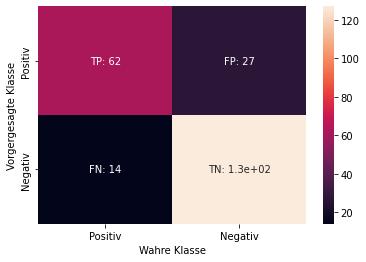

In [12]:
con_matrix = confusion_matrix(y_test, predicted)
ax = sns.heatmap(con_matrix, annot=True)
ax.set_xticklabels(("Positiv", "Negativ"))
ax.set_yticklabels(("Positiv", "Negativ"))
plt.xlabel("Wahre Klasse")
plt.ylabel("Vorgergesagte Klasse")
ax.texts[0].set_text("TP: " + ax.texts[0].get_text())
ax.texts[1].set_text("FP: " + ax.texts[1].get_text())
ax.texts[2].set_text("FN: " + ax.texts[2].get_text())
ax.texts[3].set_text("TN: " + ax.texts[3].get_text())